In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Read crypto_data.csv into pandas
df = pd.read_csv('crypto_data.csv')
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Filter for currencies that are currently being traded and drop 'IsTrading' column
trading_df = df.copy().loc[df['IsTrading'] == True]
trading_df = trading_df.drop('IsTrading', axis=1)
trading_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
# Remove all rows with null values (NaN)
trading_df = trading_df.dropna()
trading_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Filter for mined cryptocurrencies (>0) and drop 'CoinName' and 'Unnamed: 0' (unnecessary data)
mined_df = trading_df.loc[trading_df['TotalCoinsMined']>0]
mined_df = mined_df.drop('CoinName', axis=1)
mined_df = mined_df.drop('Unnamed: 0', axis=1)

# Convert 'TotalCoinSupply' to numeric type
mined_df['TotalCoinSupply'] = pd.to_numeric(mined_df['TotalCoinSupply'])

mined_df


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07


In [6]:
mined_df['ProofType'] = mined_df['ProofType'].replace(['PoW/PoS '],'PoW/PoS')
mined_df['ProofType'] = mined_df['ProofType'].replace(['Pos'],'PoS')
mined_df['ProofType'] = mined_df['ProofType'].replace(['PoS/PoW'],'PoW/PoS')
mined_df['ProofType'] = mined_df['ProofType'].replace(['PoW and PoS'],'PoW/PoS')
mined_df['ProofType'] = mined_df['ProofType'].replace(['DPOS'],'DPoS')
mined_df['ProofType'] = mined_df['ProofType'].replace(['Proof of Authority'],'PoA')
mined_df['ProofType'] = mined_df['ProofType'].replace(['TPoS'],'PoST')
mined_df['ProofType'] = mined_df['ProofType'].replace(['Proof of Trust'],'PoT')
mined_df['ProofType'] = mined_df['ProofType'].replace(['Zero-Knowledge Proof'],'0KP')

print(mined_df['ProofType'].value_counts())

PoW            237
PoW/PoS        180
PoS             87
DPoS            10
PoC              3
PoA              2
PoST             2
dPoW/PoW         1
HPoW             1
PoT              1
PoW/nPoS         1
0KP              1
LPoS             1
PoW/PoW          1
PoS/PoW/PoT      1
PoW + Hive       1
POBh             1
PoS/LPoS         1
Name: ProofType, dtype: int64


In [7]:
# Convert text values to numeric
X = pd.get_dummies(mined_df)
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoS/LPoS,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Use Principal Component Analysis (PCA) to reduce dimensions of data

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get principal components for the data.
cc_pca = pca.fit_transform(X_scaled)

In [10]:
# Analyze data using T-distributed stochastic neighbor embedding (t-SNE)

# Initialize t-SNE model
tsne = TSNE(learning_rate=35, random_state=26)

# Reduce dimensions
tsne_features = tsne.fit_transform(cc_pca)


In [11]:
# View number of columns
tsne_features.shape

(532, 2)

In [12]:
# Create data frame
tsne_df = pd.DataFrame()

# Append the first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# Append the second column of transformed features
tsne_df['y'] = tsne_features[:,1]

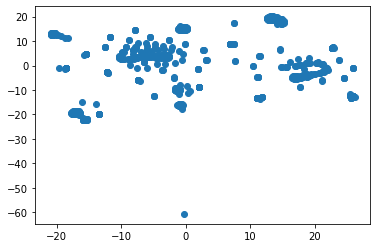

In [13]:
# Visualize data in scatter plot
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

In [14]:
# Analyze with K-Means
# Initializing model
model = KMeans(n_clusters=4, random_state=26)

# Fitting model
model.fit(X_scaled)

KMeans(n_clusters=4, random_state=26)

In [15]:
# Get predictions
predictions = model.predict(X_scaled)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [16]:
mined_df['Class'] = predictions
mined_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,1
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,1
5,X13,PoW/PoS,2.927942e+10,3.141593e+11,1
7,SHA-256,PoW,1.792718e+07,2.100000e+07,1
8,Ethash,PoW,1.076842e+08,0.000000e+00,1
...,...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09,1
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08,1
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09,1
1246,Equihash,PoW,7.296538e+06,2.100000e+07,1


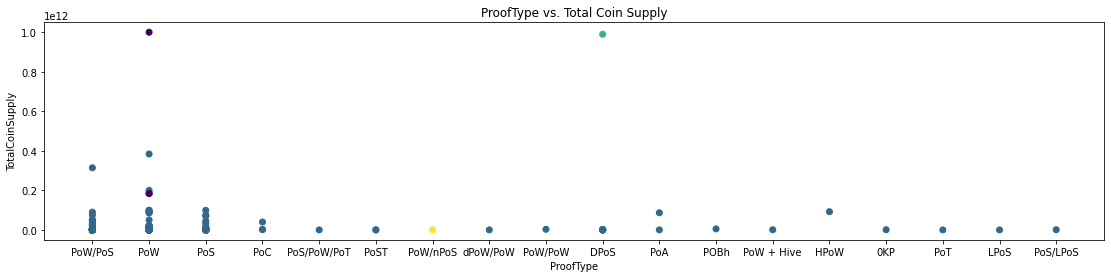

In [18]:
plt.figure(figsize=(19,4))
scatter = plt.scatter(x=mined_df["ProofType"], y=mined_df['TotalCoinSupply'], c=mined_df['Class'])
plt.xlabel('ProofType')
plt.ylabel('TotalCoinSupply')
plt.title('ProofType vs. Total Coin Supply')

plt.show()

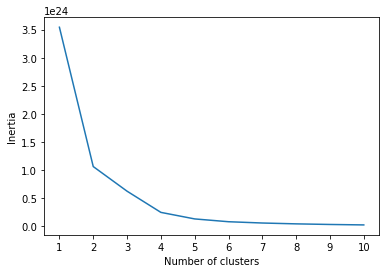

In [19]:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


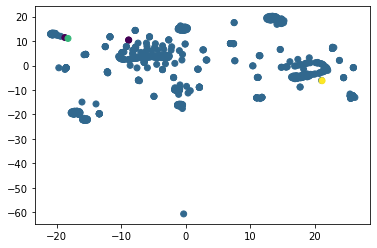

In [20]:
plt.scatter(tsne_df['x'], tsne_df['y'], c=mined_df['Class'])
plt.show()

In [21]:
mined_df = mined_df.sort_values('Class')

mined_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class
903,CryptoNight,PoW,5.313984e+10,1.000000e+12,0
1052,CryptoNight Heavy,PoW,9.955311e+10,1.844700e+11,0
1005,CryptoNight Heavy,PoW,1.915363e+07,1.500000e+08,0
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,1
878,Scrypt,PoW,4.548305e+07,6.400000e+07,1
...,...,...,...,...,...
440,Equihash,dPoW/PoW,1.158981e+08,2.000000e+08,1
426,Scrypt,PoW/PoS,8.130923e+08,2.000000e+09,1
1247,Scrypt,PoS,1.283270e+05,1.000000e+06,1
1234,TRC10,DPoS,9.899887e+11,9.900000e+11,2


### Conclusion
Analyzing the data with T-distributed stochastic neighbor embedding (t-SNE) seems to show at least two, maybe three clusters, but looking at it with KMeans shows that almost all the cryptocurrencies fall into one class, with a few outliers. Ultimately, it looks like the cryptocurriencies cannot really be clustered together in any definite way.